# Assignment-2: Manifold Learning

The objective of this assignment is to apply the concepts you have learned in class on Manifold Learning and Spectral Clustering. 

## Instructions
  - For each question you need to write the sub-problem formulation in markdown. 
  - Ensure that this notebook runs without errors when the cells are run in sequence.
  - Plagiarism will not be tolerated.
  - Use only `python3` to run your code.
  - If you are facing issues running the notebook on your local system. Use google collab to run the notebook online. To run the notebook online, go to [google collab](!https://colab.research.google.com/notebooks/intro.ipynb). Go to `File  -> Upload Notebook` and import the notebook file.

__NOTE__: If you use online platforms, you will have to upload `swissroll.dat` file separately and change the path in the code cell which loads the data.

## Submission  
- Rename the notebook to `<roll_number>.ipynb` and submit **ONLY** the notebook file on moodle.

## Problems 
 - Question 1: Spectral Clustering (10 marks)
 - Question 2: Manifold Visualization (10 marks)
 - Question 3: Clustering and Visualizing high-dimensional data (10 marks)
 - Question 4: Classification (10 marks)

## Deadline 
The deadline of this assignment is 27th April, 2020, 11:59 PM

In [1]:
# import sys
# # Install packages correctly
# !{sys.executable} -m pip install numpy sklearn tensorflow keras
# # Fix mpl version due to subtle API differences
# !{sys.executable} -m pip install matplotlib==3.0.3

import numpy
# Allow usage of both `np` and `numpy`
np = numpy
import sklearn
import matplotlib
import matplotlib.pyplot as plt

# Question 1: Spectral Clustering

Implement spectral clustering and evaluate on the given concentric circles dataset for this question.

## Part 1: Implementation
Implement spectral clustering function from scratch (for two clusters), taking as input the dataset. It must return the predicted clustering. Assume that the graph constructed is a fully connected graph. Use the normalized graph laplacian for this case.



# Spectral clustering with K Nearest Neighbors Graph

In [2]:
# Part 1: Spectral Clustering

def spectral_clustering_knn(x):
    """Args:
        X: numpy.array [num_samples, input_dim]

        Returns:
        Y_pred: numpy.array [num_samples]
          array of cluster labels
    """
    from sklearn.neighbors import radius_neighbors_graph,kneighbors_graph
    from scipy.sparse import csgraph
    from sklearn.cluster import KMeans
    num_samples=x.shape[0]
    num_dimensions=x.shape[1]
    #a=radius_neighbors_graph(x,1.5,mode='distance', metric='minkowski', p=2, metric_params=None, include_self=False)
    a=kneighbors_graph(x,num_samples-1, mode='distance', include_self=False)
    a=a.toarray()
    #print(a.shape)
    laplacian=csgraph.laplacian(a,normed=True)
    b=np.sum(a,axis=0)
    egval,egvec=np.linalg.eig(laplacian)
    y_spec =egvec[:,1].copy()
    y_spec[y_spec < 0] = 0
    y_spec[y_spec > 0] = 1
    y_preds=np.copy(y_spec)
    #print(np.unique(y_preds,return_counts=True))
    return y_preds


# Spectral clustering with Radius Neighbors Graph

In [3]:
# Part 1: Spectral Clustering

def spectral_clustering_rad(x):
    """Args:
        X: numpy.array [num_samples, input_dim]

        Returns:
        Y_pred: numpy.array [num_samples]
          array of cluster labels
    """
    from sklearn.neighbors import radius_neighbors_graph
    from scipy.sparse import csgraph
    from sklearn.cluster import KMeans
    num_samples=x.shape[0]
    num_dimensions=x.shape[1]
    a=radius_neighbors_graph(x,1.5,mode='distance', metric='minkowski', p=2, metric_params=None, include_self=False)
    a=a.toarray()
    #print(a.shape)
    laplacian=csgraph.laplacian(a,normed=True)
    b=np.sum(a,axis=0)
    egval,egvec=np.linalg.eig(laplacian)
    kmeans=KMeans(n_clusters=2,random_state=0).fit(egvec)
    y_spec =egvec[:,1].copy()
    y_spec[y_spec < 0] = 0
    y_spec[y_spec > 0] = 1
    y_preds=np.copy(y_spec)
    #print(np.unique(y_preds,return_counts=True))
    return (y_preds+1)%2


## Part 2: Clustering concentric circles
Perform spectral clustering on the concentric circles dataset. Visualize the result by plotting it on a 2-d graph. Use different colours for different clusters.

In [4]:
# DO NOT EDIT

from sklearn.datasets import make_circles 

CX, CY = make_circles(n_samples=200, shuffle=True,noise=0.05, random_state=1337, factor=0.5)
# CX: input data points [n_samples, 2]
# CY: true clusters [n_samples]

In [5]:
# Part 2: Perform Spectral Clustering on the concentric circles dataset
# Plot using colors from CY (true clusters) and CY_pred (predicted clusters)
# Code in this cell should plot 2 subplots (true labels and predicted labels)
import matplotlib.pyplot as plt
cmap = 'viridis'
dot_size=50
y_preds_rad=spectral_clustering_rad(CX)
y_preds_knn=spectral_clustering_knn(CX)
print('radius_neighboours:',np.unique(y_preds_rad,return_counts=True))
print('knn:               ',np.unique(y_preds_rad,return_counts=True))

radius_neighboours: (array([0., 1.]), array([102,  98], dtype=int64))
knn:                (array([0., 1.]), array([102,  98], dtype=int64))


## Part 3: Evaluate accuracy
Evaluate the accuracy of the clustering by comparing it with the true labels. Create two subplots (true vs predicted) with the color of each point showing the cluster label.

# Original clusters

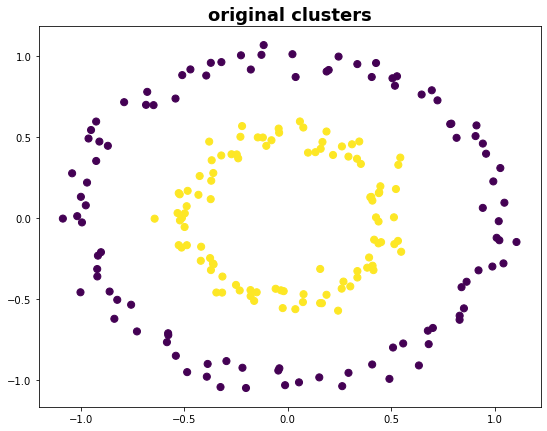

In [6]:
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('original clusters', fontsize=18, fontweight='demi')
plt.scatter(CX[:, 0], CX[:, 1], c=CY, s=dot_size, cmap=cmap)

(array([0., 1.]), array([102,  98], dtype=int64))


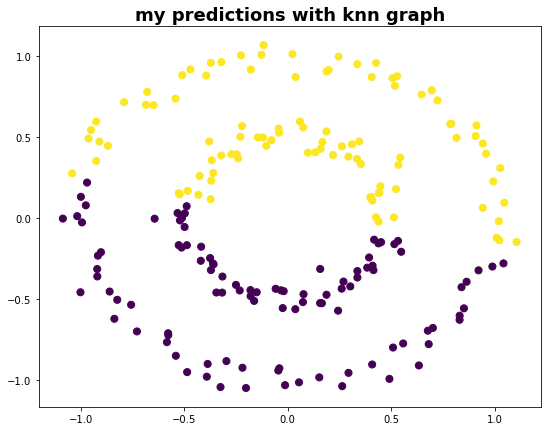

In [7]:
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('my predictions with knn graph', fontsize=18, fontweight='demi')
plt.scatter(CX[:, 0], CX[:, 1], c=y_preds_knn, s=dot_size, cmap=cmap)
print(np.unique(y_preds_knn,return_counts=True))

(array([0., 1.]), array([102,  98], dtype=int64))


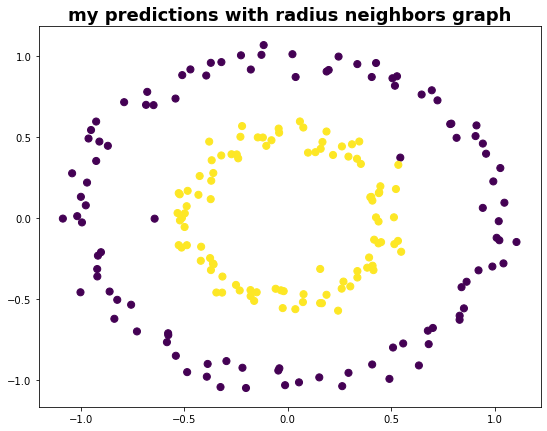

In [8]:
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('my predictions with radius neighbors graph', fontsize=18, fontweight='demi')
plt.scatter(CX[:, 0], CX[:, 1], c=y_preds_rad, s=dot_size, cmap=cmap)
print(np.unique(y_preds_rad,return_counts=True))

# Accuracy

In [9]:
print('knn accuracy             ',np.sum(y_preds_knn==CY)/CY.shape[0])
print('radius neighbor accuracy',np.sum(y_preds_rad==CY)/CY.shape[0])

knn accuracy              0.49
radius neighbor accuracy 0.99




---



# Question 2: Manifold Visualization
Implement the various manifold learning methods and visualize the given datasets.


## Part 1: MDS
Implement Multi-Dimensional Scaling

In [10]:
def get_eig_val_vec(data):
    from scipy.linalg import eig,eigh
    eig_val,eig_vec=eig(data)
    return eig_val,eig_vec

In [11]:
# Part 1: MDS
    
def MDS(X, k, output_dim=2):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data
    
    Returns:
    Y: numpy.array [n_samples, output_dim]
    """
    from sklearn.metrics import pairwise_distances
    from sklearn.preprocessing import StandardScaler
    from sklearn.neighbors import kneighbors_graph
    from scipy.linalg import eig,eigh
    sc=StandardScaler()
    data = pairwise_distances(X)
    data=sc.fit_transform(data)
    #print(data)
    eig_val_cov, eig_vec_cov =get_eig_val_vec(data)
    eig_pairs = [
        (np.abs(eig_val_cov[i]), eig_vec_cov[:, i]) for i in range(len(eig_val_cov))
    ]

    # Select n_components eigenvectors with largest eigenvalues, obtain subspace transform matrix
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    eig_pairs = np.array(eig_pairs)
    reduced = np.hstack(
        [eig_pairs[i, 1].reshape(data.shape[1], 1) for i in range(output_dim)]
    )

    return reduced

## Part 2: LLE
Implement Locally Linear Embedding function

In [12]:
# Part 2: LLE

def LLE(X, k, output_dim=2):
    from sklearn.metrics import pairwise_distances
    from sklearn.preprocessing import StandardScaler
    from sklearn.neighbors import kneighbors_graph
    from scipy.linalg import eig,eigh
    sc=StandardScaler()
    data = pairwise_distances(X)
    neighbors=np.zeros_like(data)
    sort_distances = np.argsort(data, axis=1)[:, 1:k+1]
    
    for m,i in enumerate(sort_distances):
        neighbors[m,i] = data[m,i]

    num_samples=X.shape[0]   
    weights=np.zeros((num_samples,num_samples))
    
    for i in range(num_samples):
        k_indexes=sort_distances[i,:]
        nearest_neighbors=X[k_indexes,:]-X[i,:]
        nn=np.dot(nearest_neighbors,nearest_neighbors.T)
        h_inv=np.linalg.pinv(nn)
        
        lambda_par = 2/np.sum(h_inv)
        weights[i, k_indexes] = lambda_par*np.sum(h_inv, axis=1)/2
    
    m = np.subtract(np.eye(num_samples), weights)
    eigen_data=np.dot(np.transpose(m), m)
    _,eigen_vectors=eigh(eigen_data)
    Y= eigen_vectors[:, 1:output_dim+1]
    return Y

## Part 3: ISOMAP
Implement Isomap Visualization  

In [13]:
# Part 3: Isomap

def ISOMAP(X, k, output_dim=2):
    from sklearn.metrics import pairwise_distances
    from sklearn.preprocessing import StandardScaler
    from sklearn.neighbors import kneighbors_graph
    from sklearn.utils.graph import graph_shortest_path
    
    data = pairwise_distances(X)
    neighbors=np.zeros_like(data)
    sort_distances = np.argsort(data, axis=1)[:, 1:k+1]
    
    for m,i in enumerate(sort_distances):
        neighbors[m,i] = data[m,i]
    
    graph = graph_shortest_path(neighbors, directed=False)
    graph = -0.5 * (graph ** 2)
    #print(graph)
    Y=MDS(graph,k,output_dim)
    return Y

## Part 3: Manifold Visualization
Visualize the S-shaped 3-d dataset using the MDS, ISOMAP, LLE

In [14]:
# DO NOT EDIT

from sklearn import manifold, datasets

SX, St = datasets.make_s_curve(n_samples=2100, random_state=1337)
# SX: input data [n_samples, 3]
# St: univariate position along manifold [n_samples], use for coloring the plots

# MDS

Text(0.5, 1.0, '2d scatter plot')

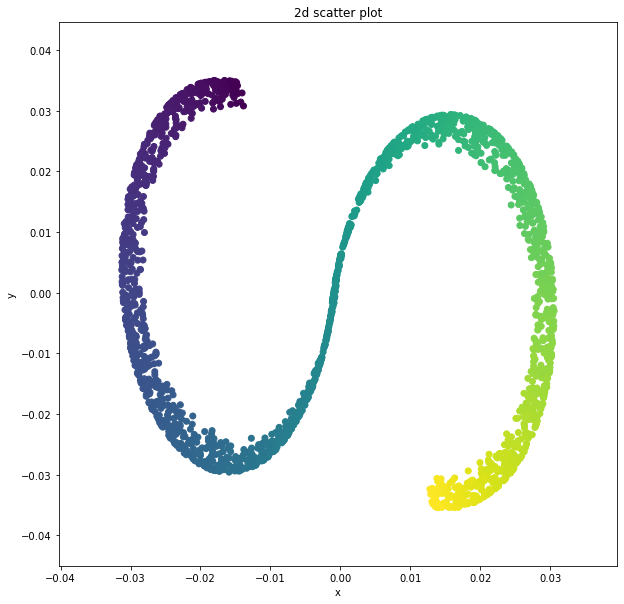

In [15]:
y_pred=MDS(SX,10,2)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(y_pred[:,0],y_pred[:,1],c=St)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('2d scatter plot')

# LLE

Text(0.5, 1.0, '2d scatter plot')

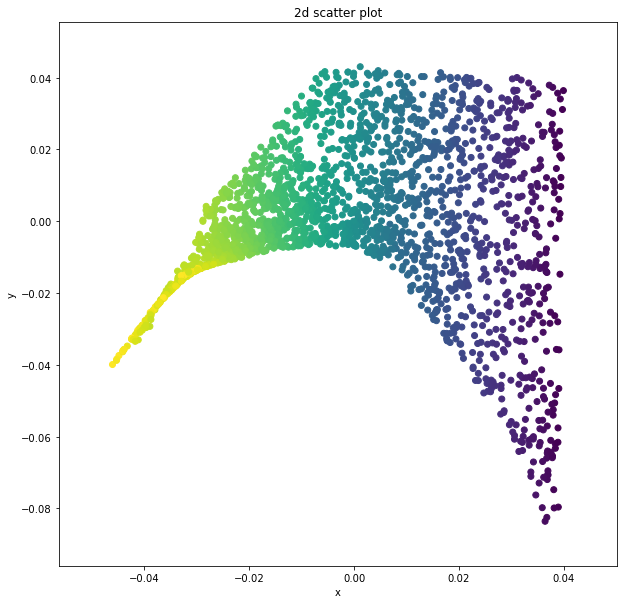

In [16]:
y_pred_lle=LLE(SX,10,2)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(y_pred_lle[:,0],y_pred_lle[:,1],c=St)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('2d scatter plot')

# ISOMAP

Text(0.5, 1.0, '2d scatter plot')

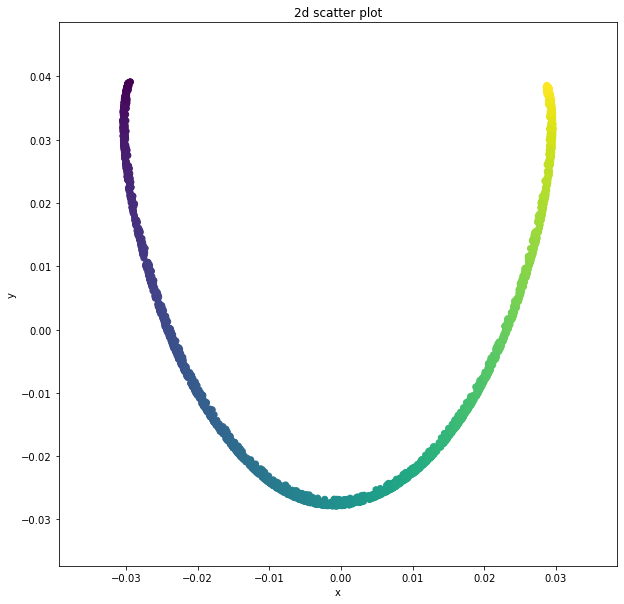

In [17]:
y_pred_isomap=ISOMAP(SX,10,2)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(y_pred_isomap[:,0],y_pred_isomap[:,1],c=St)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('2d scatter plot')

In [18]:
# from sklearn.manifold import LocallyLinearEmbedding
# embedding=LocallyLinearEmbedding(n_neighbors=10,n_components=2)
# sklearn_isomap=embedding.fit_transform(SX)
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111)
# ax.scatter(sklearn_isomap[:,0],sklearn_isomap[:,1],c=St)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# plt.title('2d scatter plot')

The code in the next cell should draw a single plot with the following subplots:
1. 3D S-shaped dataset
2. 2D Manifold learnt using MDS
3. 2D Manifold learnt using ISOMAP
4. 2D Manifold learnt using LLE

Use the `St` variable to color the points in your visualizations. Use a color spectrum, and the position along the manifold to assign the color.

In [19]:
# import plotly.express as px
# fig = px.scatter_3d(SX,color=St)
# fig.show()

Text(0.5, 0.92, '3d scatter plot')

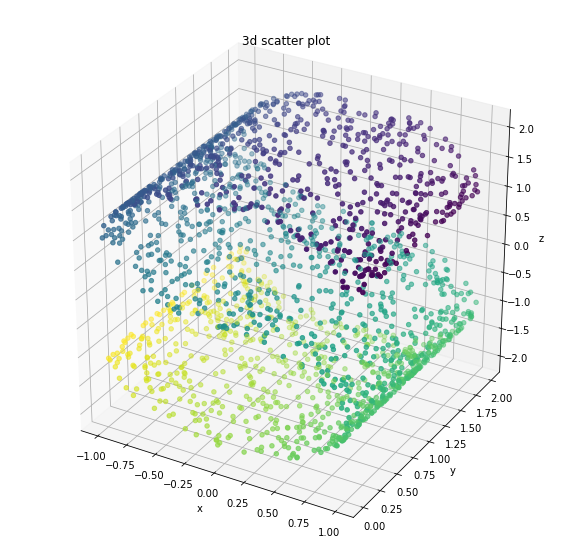

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(SX[:,0],SX[:,1],SX[:,2],c=St,zdir='z')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('3d scatter plot')


# Question 3: Clustering and Visualizing high-dimensional data
Perform k-means and spectral clustering on the Swiss roll dataset and visualize using the above 3 methods. State your observations.

In [21]:
# Swiss roll dataset loading here
d = []
with open('./swissroll.dat', 'r') as dat_file:
    for line in dat_file:
        line = line.strip().split()
        line = [float(x.strip()) for x in line]
        d.append(line)
swissroll = numpy.array(d)
print (swissroll.shape)

(1600, 3)


Text(0.5, 0.92, '3d scatter plot')

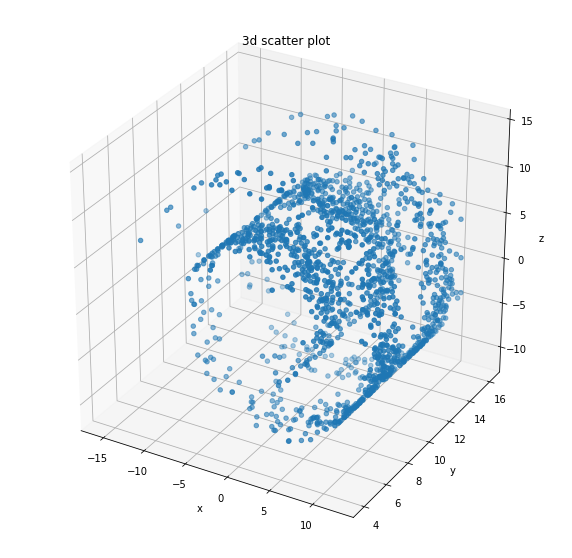

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(swissroll[:,0],swissroll[:,1],swissroll[:,2],zdir='z',depthshade=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('3d scatter plot')

Procedure for this question:
1. Perform spectral clustering (2 clusters) on the unchanged Swiss roll and visualize (binary colors)
2. Unwrap the manifold in 2D and visualize using
  - MDS
  - ISOMAP
  - LLE

Use the labels from the spectral clustering to color the unwrapped manifolds.

# Spectral clustering

In [23]:
# Part 1: Spectral Clustering

def spectral_clustering2(x,rads):
    """Args:
        X: numpy.array [num_samples, input_dim]

        Returns:
        Y_pred: numpy.array [num_samples]
          array of cluster labels
    """
    from sklearn.neighbors import radius_neighbors_graph
    from scipy.sparse import csgraph
    from sklearn.cluster import KMeans
    num_samples=x.shape[0]
    num_dimensions=x.shape[1]
    a=radius_neighbors_graph(x,rads,mode='distance', metric='minkowski', p=2, metric_params=None, include_self=False)
    a=a.toarray()
    #print(a.shape)
    laplacian=csgraph.laplacian(a,normed=True)
    b=np.sum(a,axis=0)
    egval,egvec=np.linalg.eig(laplacian)
    #kmeans=KMeans(n_clusters=2,random_state=0).fit(egvec)
    y_spec =egvec[:,1].copy()
    y_spec[y_spec < 0] = 0
    y_spec[y_spec > 0] = 1
    y_preds=np.copy(y_spec)
    #print(np.unique(y_preds,return_counts=True))
    return (y_preds+1)%2


Text(0.5, 0.92, '3d scatter plot for spectral clustering')

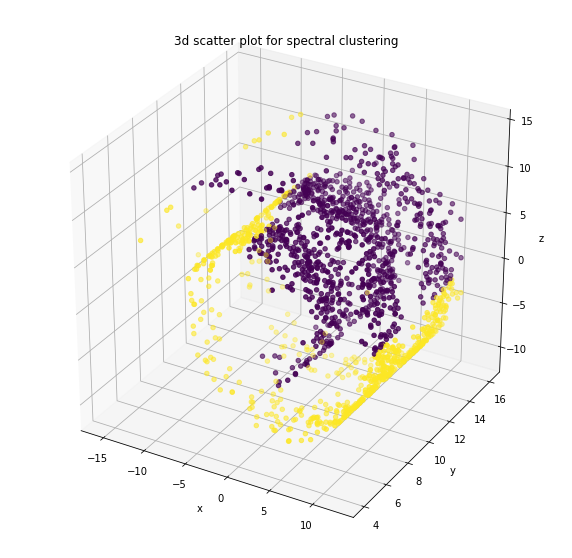

In [37]:
res=spectral_clustering2(swissroll,2)
# fig, ax = plt.subplots(figsize=(9,7))
# ax.set_title('my predictions', fontsize=18, fontweight='demi')
# plt.scatter(swissroll[:, 1],swissroll[:,2], c=res, s=dot_size, cmap=cmap)
# print(np.unique(y_preds,return_counts=True))
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(swissroll[:,0],swissroll[:,1],swissroll[:,2],c=res,zdir='z',depthshade=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('3d scatter plot for spectral clustering')

# K-Means

Text(0.5, 0.92, '3d scatter plot for kmeans clustering')

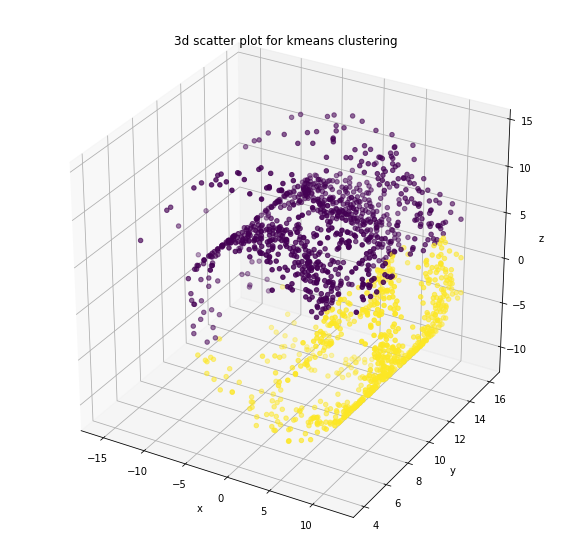

In [44]:
from sklearn.cluster import KMeans
kmeans_res=KMeans(n_clusters=2).fit(swissroll)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(swissroll[:,0],swissroll[:,1],swissroll[:,2],c=kmeans_res.labels_,zdir='z',depthshade=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('3d scatter plot for kmeans clustering')

# Observation

I observed that both Kmeans and Spectral clustering almost perform equivalently on the swiss roll data.
The little differnce arises because spectral clustering uses geodesic distance approximated by local eucledian distances.
Spectral clustering clusters the points in the manifold space, whereas Kmeans clustering algorithm basically directly computes eucledian distances and clusters them.Kmeans clusters the points in the current space and not the manifold space.

# MDS

Text(0.5, 1.0, '3d scatter plot')

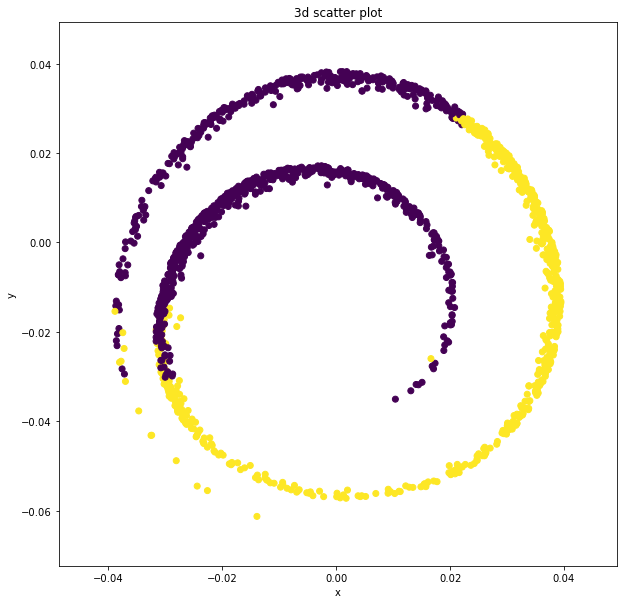

In [25]:
res_mds=MDS(swissroll,10,2)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(res_mds[:,0],res_mds[:,1],c=res)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('3d scatter plot')

# LLE

Text(0.5, 1.0, '3d scatter plot')

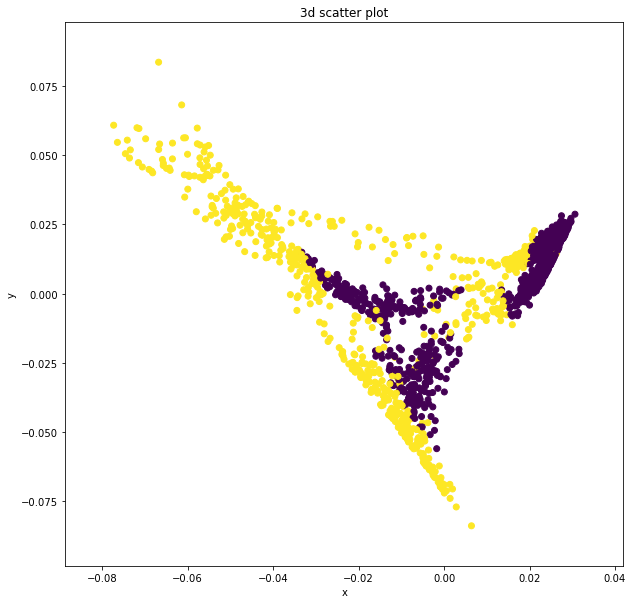

In [26]:
res_lle=LLE(swissroll,10,2)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(res_lle[:,0],res_lle[:,1],c=res)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('3d scatter plot')

# ISOMAP

c:\users\rishab\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 1.0, '3d scatter plot')

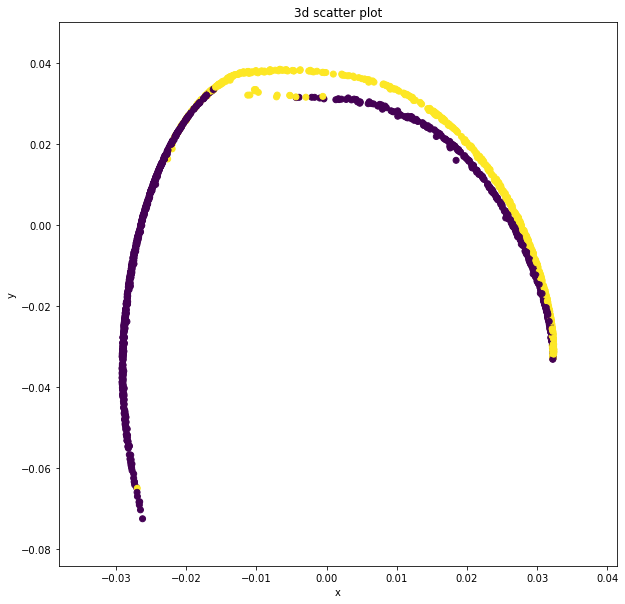

In [27]:
res_iso=ISOMAP(swissroll,10,2)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(res_iso[:,0],res_iso[:,1],c=res)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('3d scatter plot')



---



# Question 4: Classification

Perform classification using a machine learning algorithm of your choice. Use 6k images from CIFAR-10 dataset.(5k images for training and 1k images for testing.)


*   Do dimensionality reduction on the dataset using PCA and ISOMAP.
*   Apply the classification algorithm.
*   Compare the results by changing the dimensionality of the data.
*   Use F1-score as metric.
*   Approach: Reduce the dimensionality into any two dimensions(of your choice) which are less than the initial dimensionality of the data using PCA and ISOMAP. Compare the performance metrics(F1-score) for the low dimensional data.



In [28]:
# Code for loading CIFAR-10 dataset.
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train[:5000].reshape([5000,32*32*3])
y_train = y_train[:5000]
X_test = X_test[:1000].reshape([1000,32*32*3])
y_test = y_test[:1000]
# Initial reductionUsingPCAdimensionality/number of features (32*32*3) = 3072.

Using TensorFlow backend.


In [29]:
def reductionUsingPCA(X, k, output_dim):
    from sklearn.decomposition import PCA
    pc=PCA(n_components=output_dim)
    pca_X=pc.fit_transform(X)
    return pca_X,pc

In [30]:
def reductionUsingISOMAP(X, k, output_dim):
    from sklearn.manifold import Isomap
    iso=Isomap(n_neighbors=k, n_components=output_dim)
    isomap_X=iso.fit_transform(X)
    return isomap_X,iso

In [31]:
x_train_pca,pc=reductionUsingPCA(X_train,10,1000)
print('test pca')
x_test_pca=pc.transform(X_test)
print('train iso')
x_train_iso,iso=reductionUsingISOMAP(X_train,10,1200)
print('test iso')
x_test_iso=iso.transform(X_test)

test pca
train iso
test iso


In [32]:
# Classification Algorithm 
# Extra functions here

def classification(x_train,y_train,x_test, n_classes):
    from sklearn.svm import SVC
    rb_sv=SVC(kernel='rbf',C=1.4)
    rb_sv.fit(x_train,y_train)
    labels=rb_sv.predict(x_test)
    return labels

In [33]:
print('training pca')
y_pred_pca=classification(x_train_pca,y_train.reshape(-1,),x_test_pca,10)
print('training isomap')
y_pred_iso=classification(x_train_iso,y_train.reshape(-1,),x_test_iso,10)

training pca
training isomap


In [34]:
def F1_score(y_true, y_pred):
    from sklearn.metrics import f1_score
    score=f1_score(y_true,y_pred,average='micro')
    return score

In [35]:
from sklearn.metrics import accuracy_score
print('pca accuracy_score',accuracy_score(y_test,y_pred_pca))
print('pca f1_score',F1_score(y_test,y_pred_pca))
print('isomap accuracy_score',accuracy_score(y_test,y_pred_iso))
print('isomap f1_score',F1_score(y_test,y_pred_iso))

pca accuracy_score 0.436
pca f1_score 0.436
isomap accuracy_score 0.352
isomap f1_score 0.352


In [45]:
y_pred_no_reduction=classification(X_train,y_train.reshape(-1,),X_test,10)
from sklearn.metrics import accuracy_score
print('No reduction(original_data) accuracy_score',accuracy_score(y_test,y_pred_no_reduction))
print('No reduction(original_data) f1_score',F1_score(y_test,y_pred_no_reduction))

No reduction(original_data) accuracy_score 0.437
No reduction(original_data) f1_score 0.437


# Observation

I used support vector machine for classification.The kernel i used was rbf since it has infinite vc dimension so on cifar images it can perform better than a linear kernel.We see that PCA performs better than Isomap even when isomap is constructed with higher dimension.The reason can be thought as PCA directly preserves the top 'n' directions of highest variance.PCA tries to describe the data with a linear 1-dimensional manifold, which is simply a line; of course a line fits these data quite bad. Isomap is looking for a nonlinear (i.e. curved!) n-dimensional manifold and as a reason it might lose the directions preserving the highest variances and hence perofom poorly as compared to PCA.

The results when compared with the original data (with no reduction) we see that original data has almost similar performance as compared to pca because pca has preseved almost all the variance explained.This also shows that the remaning 2072 dimensions explain very little variance.Most of the variance is  explained in 1000 dimensions,which is not the case with isomap.It tries to preseve the nonlinearity of the data where as PCA tries to preserve the directions of maximum variances.